In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
data1=pd.read_excel('C:/Users/ozlud/Desktop/Articles2396.xlsx',encoding='latin1')

In [3]:
data2=data1[['ID','articleID','newDesk', 'keywords','webURL']]

In [4]:
data3=pd.read_excel('C:/Users/ozlud/Desktop/article_2396.xlsx',encoding='latin1')
data3=data3.drop(['Unnamed: 0'], axis=1)
data3

,article_text,Ngroup
0,By John Branch The lawyer representing two fo...,Sports
1,By Lisa Friedman WASHINGTON — The Environment...,Climate
2,Critic’s Notebook What’s it like to eat at the...,Dining
3,On Location 10 Photos View Slide Show › By T...,RealEstate
4,"By Neal E. Boudette DEARBORN, Mich. — When Ji...",Business
...,...,...
2391,By Dennis Overbye The void is rocking and rol...,Science
2392,By Roni Caryn Rabin Some 3.6 percent of Ameri...,Science
2393,By Roni Caryn Rabin Patients with osteoarthri...,Science
2394,Wine School By Eric Asimov Wine can do a lot ...,Dining


In [5]:
data4=pd.concat([data2, data3], axis=1)
data4

,ID,articleID,newDesk,keywords,webURL,article_text,Ngroup
0,1,5adf6684068401528a2aa69b,Sports,"['Workplace Hazards and Violations', 'Football...",https://www.nytimes.com/2018/04/24/sports/foot...,By John Branch The lawyer representing two fo...,Sports
1,2,5adf653f068401528a2aa697,Climate,"['Environmental Protection Agency', 'Pruitt, S...",https://www.nytimes.com/2018/04/24/climate/epa...,By Lisa Friedman WASHINGTON — The Environment...,Climate
2,3,5adf4626068401528a2aa628,Dining,"['Restaurants', 'Noma (Copenhagen, Restaurant)...",https://www.nytimes.com/2018/04/24/dining/noma...,Critic’s Notebook What’s it like to eat at the...,Dining
3,4,5adef286068401528a2aa537,RealEstate,"['Interior Design and Furnishings', 'Real Esta...",https://www.nytimes.com/2018/04/24/realestate/...,On Location 10 Photos View Slide Show › By T...,RealEstate
4,5,5adef237068401528a2aa532,Business,"['Hackett, Jim', 'Ford Motor Co', 'Automobiles...",https://www.nytimes.com/2018/04/24/business/fo...,"By Neal E. Boudette DEARBORN, Mich. — When Ji...",Business
...,...,...,...,...,...,...,...
2391,2392,59302c097c459f24986e2d75,Science,"['Black Holes (Space)', 'Laser Interferometer ...",https://www.nytimes.com/2017/06/01/science/bla...,By Dennis Overbye The void is rocking and rol...,Science
2392,2393,5930379e7c459f24986e2daf,Science,"['Anaphylactic Shock', 'Food', 'Allergies', 'N...",https://www.nytimes.com/2017/06/01/well/eat/fo...,By Roni Caryn Rabin Some 3.6 percent of Ameri...,Science
2393,2394,593039197c459f24986e2db2,Science,"['Arthritis', 'Pain-Relieving Drugs', 'Knees',...",https://www.nytimes.com/2017/06/01/well/live/c...,By Roni Caryn Rabin Patients with osteoarthri...,Science
2394,2395,5930707f7c459f24986e2e7d,Dining,['Wines'],https://www.nytimes.com/2017/06/01/dining/wine...,Wine School By Eric Asimov Wine can do a lot ...,Dining


In [6]:
corpus=data4['article_text'].tolist()

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [8]:
my_tokenizer= lambda x: [t.lemma_ for t in nlp(x.lower()) if t.pos_ in ['NOUN', 'PROPN', 'ADJ', 'VERB']]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
X = vectorizer.fit_transform(corpus)

In [11]:
X.shape

(2396, 53153)

In [12]:
topics = data4['newDesk'].unique()
topics

array(['Sports', 'Climate', 'Dining', 'RealEstate', 'Business',
       'Politics', 'Culture', 'Arts&Leisure', 'Science', 'Travel',
       'Photo'], dtype=object)

In [13]:
from sklearn.cluster import KMeans

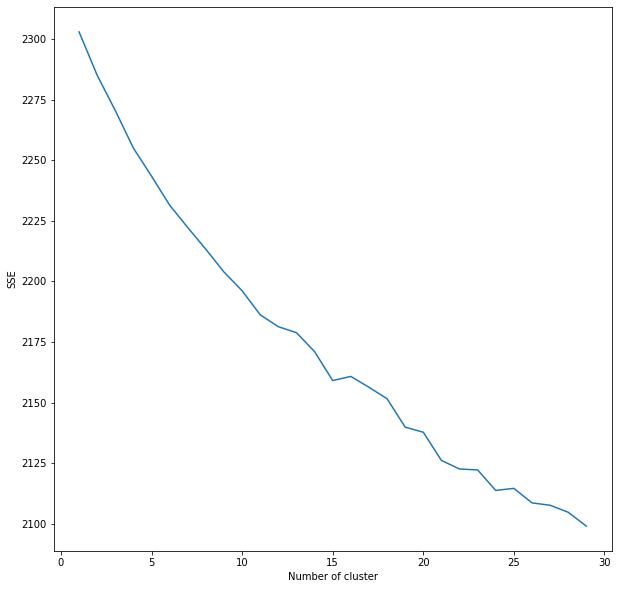

In [15]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
seed_random = 0

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 30)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    )
    labels_clusters = kmeans.fit_predict(X)
    
    #Insert fitted model and calculated cluster labels in dictionaries, for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(X, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  }
    df_scores.append(tmp_scores)

In [17]:
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

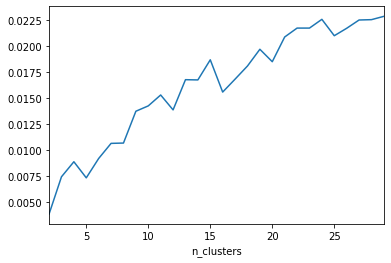

In [18]:
df_scores["silhouette_score"].plot()

In [19]:
tuples= tuple(df_scores.itertuples(index=True))
sorted(tuples, key=lambda s: s[1], reverse=True)

[Pandas(Index=29, silhouette_score=0.022866034696857614),
 Pandas(Index=24, silhouette_score=0.022577377170937097),
 Pandas(Index=28, silhouette_score=0.022546645453450316),
 Pandas(Index=27, silhouette_score=0.022513383867279507),
 Pandas(Index=23, silhouette_score=0.021735207127661978),
 Pandas(Index=22, silhouette_score=0.021734569745474448),
 Pandas(Index=26, silhouette_score=0.021715574840192355),
 Pandas(Index=25, silhouette_score=0.02100018087266894),
 Pandas(Index=21, silhouette_score=0.02087685825441803),
 Pandas(Index=19, silhouette_score=0.019695241606161092),
 Pandas(Index=15, silhouette_score=0.018681568384119964),
 Pandas(Index=20, silhouette_score=0.018498195938699124),
 Pandas(Index=18, silhouette_score=0.01808434692044771),
 Pandas(Index=17, silhouette_score=0.016819934986600355),
 Pandas(Index=13, silhouette_score=0.01676706375230112),
 Pandas(Index=14, silhouette_score=0.016744771996097817),
 Pandas(Index=16, silhouette_score=0.01557519738071163),
 Pandas(Index=11, s

In [20]:
kmns = KMeans(n_clusters=21, random_state=0)

In [21]:
y_pred = kmns.fit_predict(X)

In [22]:
category_list= y_pred.tolist()

In [23]:
from pandas import DataFrame
cats = DataFrame(category_list,columns=['cat_no'])

In [24]:
data5=pd.concat([data4, cats], axis=1)
data5

,ID,articleID,newDesk,keywords,webURL,article_text,Ngroup,cat_no
0,1,5adf6684068401528a2aa69b,Sports,"['Workplace Hazards and Violations', 'Football...",https://www.nytimes.com/2018/04/24/sports/foot...,By John Branch The lawyer representing two fo...,Sports,20
1,2,5adf653f068401528a2aa697,Climate,"['Environmental Protection Agency', 'Pruitt, S...",https://www.nytimes.com/2018/04/24/climate/epa...,By Lisa Friedman WASHINGTON — The Environment...,Climate,4
2,3,5adf4626068401528a2aa628,Dining,"['Restaurants', 'Noma (Copenhagen, Restaurant)...",https://www.nytimes.com/2018/04/24/dining/noma...,Critic’s Notebook What’s it like to eat at the...,Dining,6
3,4,5adef286068401528a2aa537,RealEstate,"['Interior Design and Furnishings', 'Real Esta...",https://www.nytimes.com/2018/04/24/realestate/...,On Location 10 Photos View Slide Show › By T...,RealEstate,16
4,5,5adef237068401528a2aa532,Business,"['Hackett, Jim', 'Ford Motor Co', 'Automobiles...",https://www.nytimes.com/2018/04/24/business/fo...,"By Neal E. Boudette DEARBORN, Mich. — When Ji...",Business,4
...,...,...,...,...,...,...,...,...
2391,2392,59302c097c459f24986e2d75,Science,"['Black Holes (Space)', 'Laser Interferometer ...",https://www.nytimes.com/2017/06/01/science/bla...,By Dennis Overbye The void is rocking and rol...,Science,16
2392,2393,5930379e7c459f24986e2daf,Science,"['Anaphylactic Shock', 'Food', 'Allergies', 'N...",https://www.nytimes.com/2017/06/01/well/eat/fo...,By Roni Caryn Rabin Some 3.6 percent of Ameri...,Science,14
2393,2394,593039197c459f24986e2db2,Science,"['Arthritis', 'Pain-Relieving Drugs', 'Knees',...",https://www.nytimes.com/2017/06/01/well/live/c...,By Roni Caryn Rabin Patients with osteoarthri...,Science,5
2394,2395,5930707f7c459f24986e2e7d,Dining,['Wines'],https://www.nytimes.com/2017/06/01/dining/wine...,Wine School By Eric Asimov Wine can do a lot ...,Dining,3


In [25]:
data5.to_excel("data5-21c.xlsx")

In [26]:
category = lambda x: list(data5[data5.articleID==x].cat_no.values)

In [27]:
sample_cat = data5.articleID.unique()

In [28]:
category_map = dict([(b, category(b)) for b in sample_cat])

In [29]:
category_map['5a7356e410f40f00018bf049']

[20]

In [30]:
from collections import defaultdict

In [31]:
def tokenize(text):
    doc = nlp(text)
    tokens = []
    for sentence in doc.sents:
        tokens.append([(t.lemma_, t.pos_) for t in sentence])
    return tokens

In [32]:
def shift_ngrams(text, window=3):
    grams = []
    for sent in tokenize(text):
        for i, (token, pos) in enumerate(sent):
            if pos == 'NOUN':
                grams.append(token)
                for token_j, pos_j in sent[max([i-window, 0]):i+window+1]:
                    if pos_j in ['NOUN', 'PROPN', 'ADJ', 'VERB'] and token_j != token:
                            grams.append((token_j, token))
    return grams

In [33]:
unigram = defaultdict(lambda: defaultdict(lambda: 0))

article_ids= data5.articleID.values
article_text = data5.article_text.values

for i, text in tqdm(list(enumerate(article_text))):
    article = article_ids[i]
    for token in shift_ngrams(text):
        for k in category_map[article]:
            if isinstance(token, tuple):
                for x in token:
                    unigram[k][x] += 1
            else:
                unigram[k][token] += 1
U = dict([(x, dict(y)) for x, y in unigram.items()])

  0%|          | 0/2396 [00:00<?, ?it/s]

In [34]:
global_u = defaultdict(lambda: 0)
global_s = 0
for k, v in U.items():
    for t, w in v.items():
        global_u[t] += w
        global_s += w

In [35]:
def kl_unigram(category, unigram):
    kl = {}
    s = sum(unigram[category].values())
    for k, v in unigram[category].items():
        p_k = v / s
        q_k = global_u[k] / global_s
        kl[k] = p_k * np.log(p_k / q_k)
    return kl

In [36]:
items_by_topic=[]
for i in range (21):
    klu = kl_unigram(i, U)
    candidates = [(k, v) for k, v in sorted(klu.items(), key=lambda x: -x[1])]
    items_by_topic.append((i, candidates[:20]))
items_by_topic

[(0,
  [('team', 0.058972351342843246),
   ('season', 0.0419445778764935),
   ('Knicks', 0.03633675202011819),
   ('draft', 0.03194961743679041),
   ('franchise', 0.028247718059600305),
   ('Anthony', 0.027103099140360336),
   ('pick', 0.02660097048831564),
   ('guard', 0.025309328224395865),
   ('Oakley', 0.024931489143598606),
   ('player', 0.02378933291682403),
   ('Jackson', 0.022290955784251894),
   ('night', 0.018388477536628842),
   ('Dolan', 0.017725692212496168),
   ('coach', 0.01717321630848272),
   ('game', 0.016428638576138552),
   ('playoff', 0.016411692738004982),
   ('president', 0.014665930017654339),
   ('clause', 0.014404414689113049),
   ('river', 0.01250469694306205),
   ('contract', 0.012011586714552651)]),
 (1,
  [('user', 0.06823082270326865),
   ('Facebook', 0.04772172351315358),
   ('datum', 0.04708273542064571),
   ('company', 0.041781864715369946),
   ('privacy', 0.027206152099455035),
   ('ad', 0.024462809922424913),
   ('information', 0.0209564222100615),
 

In [37]:
cat_codes=pd.read_excel('C:/Users/ozlud/Desktop/category_codes.xlsx',encoding='latin1')
cat_codes

,Category,Cat_Code
0,Sports,0
1,Environmental Protection,4
2,Dining,6
3,"Travel, Vacations, Arts, Leisure",16
4,Technology,19
...,...,...
2391,"Travel, Vacations, Arts, Leisure",16
2392,Health Science and Research,14
2393,Science and Research,5
2394,Wines,3


In [38]:
data6=pd.concat([data5, cat_codes], axis=1)
data6

,ID,articleID,newDesk,keywords,webURL,article_text,Ngroup,cat_no,Category,Cat_Code
0,1,5adf6684068401528a2aa69b,Sports,"['Workplace Hazards and Violations', 'Football...",https://www.nytimes.com/2018/04/24/sports/foot...,By John Branch The lawyer representing two fo...,Sports,20,Sports,0
1,2,5adf653f068401528a2aa697,Climate,"['Environmental Protection Agency', 'Pruitt, S...",https://www.nytimes.com/2018/04/24/climate/epa...,By Lisa Friedman WASHINGTON — The Environment...,Climate,4,Environmental Protection,4
2,3,5adf4626068401528a2aa628,Dining,"['Restaurants', 'Noma (Copenhagen, Restaurant)...",https://www.nytimes.com/2018/04/24/dining/noma...,Critic’s Notebook What’s it like to eat at the...,Dining,6,Dining,6
3,4,5adef286068401528a2aa537,RealEstate,"['Interior Design and Furnishings', 'Real Esta...",https://www.nytimes.com/2018/04/24/realestate/...,On Location 10 Photos View Slide Show › By T...,RealEstate,16,"Travel, Vacations, Arts, Leisure",16
4,5,5adef237068401528a2aa532,Business,"['Hackett, Jim', 'Ford Motor Co', 'Automobiles...",https://www.nytimes.com/2018/04/24/business/fo...,"By Neal E. Boudette DEARBORN, Mich. — When Ji...",Business,4,Technology,19
...,...,...,...,...,...,...,...,...,...,...
2391,2392,59302c097c459f24986e2d75,Science,"['Black Holes (Space)', 'Laser Interferometer ...",https://www.nytimes.com/2017/06/01/science/bla...,By Dennis Overbye The void is rocking and rol...,Science,16,"Travel, Vacations, Arts, Leisure",16
2392,2393,5930379e7c459f24986e2daf,Science,"['Anaphylactic Shock', 'Food', 'Allergies', 'N...",https://www.nytimes.com/2017/06/01/well/eat/fo...,By Roni Caryn Rabin Some 3.6 percent of Ameri...,Science,14,Health Science and Research,14
2393,2394,593039197c459f24986e2db2,Science,"['Arthritis', 'Pain-Relieving Drugs', 'Knees',...",https://www.nytimes.com/2017/06/01/well/live/c...,By Roni Caryn Rabin Patients with osteoarthri...,Science,5,Science and Research,5
2394,2395,5930707f7c459f24986e2e7d,Dining,['Wines'],https://www.nytimes.com/2017/06/01/dining/wine...,Wine School By Eric Asimov Wine can do a lot ...,Dining,3,Wines,3


In [39]:
data7=data6[['articleID','keywords','Ngroup','cat_no','Category','Cat_Code']]
data7

,articleID,keywords,Ngroup,cat_no,Category,Cat_Code
0,5adf6684068401528a2aa69b,"['Workplace Hazards and Violations', 'Football...",Sports,20,Sports,0
1,5adf653f068401528a2aa697,"['Environmental Protection Agency', 'Pruitt, S...",Climate,4,Environmental Protection,4
2,5adf4626068401528a2aa628,"['Restaurants', 'Noma (Copenhagen, Restaurant)...",Dining,6,Dining,6
3,5adef286068401528a2aa537,"['Interior Design and Furnishings', 'Real Esta...",RealEstate,16,"Travel, Vacations, Arts, Leisure",16
4,5adef237068401528a2aa532,"['Hackett, Jim', 'Ford Motor Co', 'Automobiles...",Business,4,Technology,19
...,...,...,...,...,...,...
2391,59302c097c459f24986e2d75,"['Black Holes (Space)', 'Laser Interferometer ...",Science,16,"Travel, Vacations, Arts, Leisure",16
2392,5930379e7c459f24986e2daf,"['Anaphylactic Shock', 'Food', 'Allergies', 'N...",Science,14,Health Science and Research,14
2393,593039197c459f24986e2db2,"['Arthritis', 'Pain-Relieving Drugs', 'Knees',...",Science,5,Science and Research,5
2394,5930707f7c459f24986e2e7d,['Wines'],Dining,3,Wines,3


In [40]:
data7['Category'].unique()

array(['Sports', 'Environmental Protection', 'Dining',
       'Travel, Vacations, Arts, Leisure', 'Technology', 'Politics',
       'Business', 'Theather and Movies', 'Science and Research',
       'Housing', 'TV Programs', 'International Trade', 'Real Estate',
       'Late Night Shows', 'Wines', 'Social Networking Services',
       'Health Science and Research', 'Baseball', 'Sexual Harassment',
       'Economy'], dtype=object)

In [41]:
reviews=pd.read_excel('C:/Users/ozlud/Desktop/commentsall.xlsx',encoding='latin1')
reviews

,articleID,commentID,newDesk,commentBody
0,58defd317c459f24986d7c95,22015199,Sports,It's not clear that athletic administrators at...
1,58defd317c459f24986d7c95,22012600,Sports,I recognize a hit piece full of carefully word...
2,58defd317c459f24986d7c95,22010581,Sports,The timing of this article is repulsive. Fina...
3,58defd317c459f24986d7c95,22014469,Sports,Who cares? It is the strange NCAA structure an...
4,58defd317c459f24986d7c95,22013005,Sports,How are these guys even in the tournament?<br/...
...,...,...,...,...
243988,5930707f7c459f24986e2e7c,22724393,Dining,Wines to drink as you sweat in the desert?
243989,5930707f7c459f24986e2e7c,22724698,Dining,Absolutely. Occasionally I like a German spÃ¤t...
243990,5930707f7c459f24986e2e7c,22707447,Dining,"I think Karl means ""white zinfandel"" (actually..."
243991,5930707f7c459f24986e2e7c,22724788,Dining,"No, I'm pretty sure he meant red zinfandel - I..."


In [42]:
rev = pd.merge(reviews, data7, how="inner", on=["articleID"])

In [43]:
rev=rev.drop([18026,30729,33314,78047,152407,158520,162904,62790,130476, 142632, 224487])

In [134]:
rev.to_excel("rvws.xlsx")

In [44]:
rev

,articleID,commentID,newDesk,commentBody,keywords,Ngroup,cat_no,Category,Cat_Code
0,58defd317c459f24986d7c95,22015199,Sports,It's not clear that athletic administrators at...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0
1,58defd317c459f24986d7c95,22012600,Sports,I recognize a hit piece full of carefully word...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0
2,58defd317c459f24986d7c95,22010581,Sports,The timing of this article is repulsive. Fina...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0
3,58defd317c459f24986d7c95,22014469,Sports,Who cares? It is the strange NCAA structure an...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0
4,58defd317c459f24986d7c95,22013005,Sports,How are these guys even in the tournament?<br/...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0
...,...,...,...,...,...,...,...,...,...
241791,5930707f7c459f24986e2e7c,22724393,Dining,Wines to drink as you sweat in the desert?,"['Wines', 'Riesling (Wine)', 'Germany']",Dining,3,Wines,3
241792,5930707f7c459f24986e2e7c,22724698,Dining,Absolutely. Occasionally I like a German spÃ¤t...,"['Wines', 'Riesling (Wine)', 'Germany']",Dining,3,Wines,3
241793,5930707f7c459f24986e2e7c,22707447,Dining,"I think Karl means ""white zinfandel"" (actually...","['Wines', 'Riesling (Wine)', 'Germany']",Dining,3,Wines,3
241794,5930707f7c459f24986e2e7c,22724788,Dining,"No, I'm pretty sure he meant red zinfandel - I...","['Wines', 'Riesling (Wine)', 'Germany']",Dining,3,Wines,3


In [45]:
len(rev['articleID'].unique())

2391

In [46]:
rev['Category'].unique()

array(['Sports', 'Theather and Movies',
       'Travel, Vacations, Arts, Leisure', 'Sexual Harassment',
       'Real Estate', 'Baseball', 'TV Programs', 'Science and Research',
       'Dining', 'Politics', 'Health Science and Research', 'Wines',
       'Business', 'Economy', 'Technology', 'International Trade',
       'Housing', 'Social Networking Services',
       'Environmental Protection', 'Late Night Shows'], dtype=object)

In [47]:
category2 = lambda x: list(rev[rev.commentID==x].Cat_Code.values)

In [48]:
sample_cat2 = rev.commentID.unique()

In [49]:
category_map2 = dict([(b, category2(b)) for b in sample_cat2])

In [50]:
def shift_ngrams2(text, window=3):
    grams = []
    for sent in tokenize(text):
        for i, (token, pos) in enumerate(sent):
            if pos == 'NOUN':
                grams.append(token)
                for token_j, pos_j in sent[max([i-window, 0]):i+window+1]:
                    if pos_j in ['NOUN', 'PROPN', 'ADJ','VERB'] and token_j != token:
                            grams.append((token_j, token))
    return grams

In [51]:
unigram2 = defaultdict(lambda: defaultdict(lambda: 0))

article_ids2= rev.commentID.values
article_text2 = rev.commentBody.values

for i, text in tqdm(list(enumerate(article_text2))):
    article = article_ids2[i]
    for token in shift_ngrams2(text):
        for k in category_map2[article]:
            if isinstance(token, tuple):
                for x in token:
                    unigram2[k][x] += 1
            else:
                unigram2[k][token] += 1
U2 = dict([(x, dict(y)) for x, y in unigram2.items()])

  0%|          | 0/241785 [00:00<?, ?it/s]

In [52]:
global_u2 = defaultdict(lambda: 0)
global_s2 = 0
for k, v in U2.items():
    for t, w in v.items():
        global_u2[t] += w
        global_s2 += w

In [53]:
def kl_unigram2(category2, unigram2):
    kl2 = {}
    s2 = sum(unigram2[category2].values())
    for k, v in unigram2[category2].items():
        p_k2 = v / s2
        q_k2 = global_u2[k] / global_s2
        kl2[k] = p_k2 * np.log(p_k2 / q_k2)
    return kl2

In [54]:
items_by_topic2=[]
for i in range (20):
    klu2 = kl_unigram2(i, U2)
    candidates2 = [(k, v) for k, v in sorted(klu2.items(), key=lambda x: -x[1])]
    items_by_topic2.append((i, candidates2[:100]))
items_by_topic2

[(0,
  [('team', 0.036437319948099574),
   ('player', 0.033001542637756724),
   ('sport', 0.02917459683808086),
   ('game', 0.023794099449054137),
   ('football', 0.021441712124458938),
   ('athlete', 0.015851505248839336),
   ('fan', 0.01442892180006322),
   ('basketball', 0.012706079358179051),
   ('coach', 0.011029320992166167),
   ('college', 0.008295324249324531),
   ('woman', 0.008222364206667497),
   ('cheerleader', 0.007320203610844757),
   ('play', 0.006312281037437165),
   ('league', 0.006236093916979232),
   ('school', 0.005792470708645634),
   ('ball', 0.004498142723621203),
   ('NFL', 0.004481063457359578),
   ('soccer', 0.004368620155833215),
   ('win', 0.0041415438081011694),
   ('man', 0.003941248614131696),
   ('owner', 0.003710276476684862),
   ('athletic', 0.0033955160069997917),
   ('championship', 0.0033464565828497436),
   ('season', 0.0031745229202512445),
   ('tennis', 0.002994417034669769),
   ('injury', 0.002991788327382581),
   ('field', 0.002745716073358214)

In [55]:
top_aspects_by_topic=[]
for i in range (20):
    deneme=items_by_topic2[i][1]
    for a_tuple in deneme:
        top_aspects_by_topic.append((i, a_tuple[0]))

In [56]:
target_terms = {}
for i in top_aspects_by_topic:  
   target_terms.setdefault(i[0],[]).append(i[1])
print(target_terms)

{0: ['team', 'player', 'sport', 'game', 'football', 'athlete', 'fan', 'basketball', 'coach', 'college', 'woman', 'cheerleader', 'play', 'league', 'school', 'ball', 'NFL', 'soccer', 'win', 'man', 'owner', 'athletic', 'championship', 'season', 'tennis', 'injury', 'field', 'university', 'year', 'hockey', 'stadium', 'medal', 'girl', 'tournament', 'student', 'quarterback', 'shoe', 'skater', 'program', 'playoff', 'concussion', 'performance', 'talent', 'club', 'boy', 'cheating', 'flag', 'competition', 'gold', 'rule', 'head', 'scholarship', 'great', 'watch', 'Brady', 'baseball', 'skating', 'match', 'event', 'golf', 'level', 'franchise', 'goal', 'kid', 'NCAA', 'academic', 'cheater', 'skiing', 'Patriots', 'brain', 'steroid', 'anthem', 'defense', 'olympic', 'receiver', 'patriot', 'victory', 'score', 'professional', 'catholic', 'NBA', 'body', 'shot', 'logo', 'coaching', 'testosterone', 'draft', 'youth', 'success', 'figure', 'helmet', 'tv', 'pro', 'title', 'ski', 'record', 'skier', 'penalty', 'prot

In [57]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [58]:
pos_map2 = {'NOUN': wn.NOUN, 'ADV': wn.ADV, 'ADJ': wn.ADJ, 'VERB': wn.VERB}

In [59]:
def get_pos(pos_token):
    try:
        return pos_map2[pos_token]
    except KeyError:
        return None

In [60]:
def scores(token, pos):
    synsets = wn.synsets(token, pos=get_pos(pos))
    if len(synsets) == 0:
        return np.zeros(1), np.zeros(1), np.zeros(1)
    else:
        plus, minus, obj = np.zeros(len(synsets)), np.zeros(len(synsets)), np.zeros(len(synsets))
        for i, syn in enumerate(synsets):
            sw = swn.senti_synset(syn.name())
            plus[i] = sw.pos_score()
            minus[i] = sw.neg_score()
            obj[i] = sw.obj_score()
        return plus, minus, obj

In [61]:
def shift_ngrams(text, categ, window=3):
    grams = []
    for sent in tokenize(text):
        for i, (token, pos) in enumerate(sent):
            for f in range(100):
                if token==target_terms[categ][f]:
                    for token_j, pos_j in sent[max([i-window, 0]):i+window+1]:
                        if pos_j in ['NOUN', 'ADV', 'ADJ','VERB'] and token_j != token:
                                grams.append((token_j, pos_j))
    return grams

In [62]:
def mean_strategy(text,ctg):
    tks = shift_ngrams(text,ctg)
    m = np.zeros((len(tks), 3))
    for i, (token, p) in enumerate(tks):
        p, n, o = scores(token, p)
        m[i] = np.array([p.mean(), n.mean(), o.mean()])
    return m

In [63]:
def findmean(catcode):
    topic_in=rev[rev["Cat_Code"]==catcode]
    topic_corpus=topic_in.commentBody.values
    mean_scores=[]
    nofd=len(topic_corpus)
    for i in range(nofd):
        if len(mean_strategy(topic_corpus[i],catcode))!=0:
            avr=np.array(mean_strategy(topic_corpus[i],catcode).mean(axis=0))
            mean_scores.append((i,avr))
        else:
            mean_scores.append((i,np.array([0, 0, 0])))
    return mean_scores

In [64]:
def findsenscores (catcode):
    comments = pd.DataFrame(findmean(catcode))
    ssc = comments[1]
    com_list=[]
    for i in range(len(ssc)):
        x=ssc[i]
        com_list.append(x)
    scores = pd.DataFrame(com_list)
    sen_scores = scores.rename({0:'pos', 1:'neg', 2:'obj'}, axis=1)
    return sen_scores

In [65]:
sports=findsenscores(0)

In [66]:
sports = sports.replace(0, np.NaN)

In [67]:
d0=sports.describe().T
d0

,count,mean,std,min,25%,50%,75%,max
pos,11866.0,0.079483,0.072922,0.000801,0.035714,0.061433,0.098537,1.000
neg,11385.0,0.058378,0.061005,0.000379,0.022605,0.042462,0.073260,0.875
obj,12767.0,0.811336,0.133829,0.041667,0.748762,0.833333,0.904167,1.000


In [68]:
social_network_services=findsenscores(1)
social_network_services = social_network_services.replace(0, np.NaN)
d1=social_network_services.describe().T

In [69]:
d1

,count,mean,std,min,25%,50%,75%,max
pos,6935.0,0.062518,0.050008,0.001033,0.033296,0.052236,0.076872,0.791667
neg,6780.0,0.056380,0.055893,0.000379,0.022321,0.042772,0.071577,0.750000
obj,7299.0,0.812219,0.125259,0.135417,0.756711,0.834870,0.895479,1.000000


In [70]:
d1.iloc[1]['mean']

0.056379634070225546

In [71]:
housing=findsenscores(2)
housing = housing.replace(0, np.NaN)
d2=housing.describe().T

In [72]:
wines=findsenscores(3)
wines = wines.replace(0, np.NaN)
d3=wines.describe().T

In [73]:
environmental_protection=findsenscores(4)
environmental_protection = environmental_protection.replace(0, np.NaN)
d4=environmental_protection.describe().T

In [74]:
science_research=findsenscores(5)
science_research = science_research.replace(0, np.NaN)
d5=science_research.describe().T

In [75]:
dining=findsenscores(6)
dining = dining.replace(0, np.NaN)
d6=dining.describe().T

In [76]:
international_trade=findsenscores(7)
international_trade = international_trade.replace(0, np.NaN)
d7=international_trade.describe().T

In [77]:
theater_and_movies=findsenscores(8)
theater_and_movies = theater_and_movies.replace(0, np.NaN)
d8=theater_and_movies.describe().T

In [78]:
baseball=findsenscores(9)
baseball = baseball.replace(0, np.NaN)
d9=baseball.describe().T

In [79]:
late_night_shows=findsenscores(10)
late_night_shows = late_night_shows.replace(0, np.NaN)
d10=late_night_shows.describe().T

In [80]:
TV_programs=findsenscores(11)
TV_programs = TV_programs.replace(0, np.NaN)
d11=TV_programs.describe().T

In [81]:
real_estate=findsenscores(12)
real_estate = real_estate.replace(0, np.NaN)
d12=real_estate.describe().T

In [82]:
business=findsenscores(13)
business = business.replace(0, np.NaN)
d13=business.describe().T

In [83]:
health_science_research=findsenscores(14)
health_science_research = health_science_research.replace(0, np.NaN)
d14=health_science_research.describe().T

In [84]:
economy=findsenscores(15)
economy = economy.replace(0, np.NaN)
d15=economy.describe().T

In [85]:
travel_vacations_arts_leisure=findsenscores(16)
travel_vacations_arts_leisure = travel_vacations_arts_leisure.replace(0, np.NaN)
d16=travel_vacations_arts_leisure.describe().T

In [86]:
politics=findsenscores(17)
politics = politics.replace(0, np.NaN)
d17=politics.describe().T

In [87]:
sexual_harassment=findsenscores(18)
sexual_harassment = sexual_harassment.replace(0, np.NaN)
d18=sexual_harassment.describe().T

In [88]:
technology=findsenscores(19)
technology = technology.replace(0, np.NaN)
d19=technology.describe().T

In [89]:
sentiscores_combined = pd.concat([sports, social_network_services, housing, wines, environmental_protection, science_research, 
                     dining, international_trade, theater_and_movies, baseball, late_night_shows, TV_programs, 
                     real_estate, business, health_science_research, economy, travel_vacations_arts_leisure, 
                     politics, sexual_harassment, technology], ignore_index=True)

In [90]:
sentiscores_combined

,pos,neg,obj
0,0.103272,0.057449,0.752323
1,0.027817,0.076352,0.895831
2,0.250000,0.041667,0.708333
3,0.127820,0.031167,0.841013
4,NaN,NaN,NaN
...,...,...,...
241780,0.028630,0.103896,0.867473
241781,0.109524,0.052309,0.742929
241782,NaN,NaN,NaN
241783,0.023438,0.033854,0.817708


In [91]:
rol_pos = list(x.iloc[0]['mean'] for x in [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19])
rol_pos

[0.07948343462201655,
 0.06251832545340646,
 0.0819913498016997,
 0.09040431614759983,
 0.06402961689774536,
 0.07336339511250554,
 0.09032997057074257,
 0.06323152712171957,
 0.09721902111050164,
 0.06440927110562797,
 0.08310336344094113,
 0.08660472603314481,
 0.07041594160652744,
 0.06256749929234673,
 0.07070919009180929,
 0.06184290300587631,
 0.0934513147204793,
 0.07073793513597561,
 0.08266822078025604,
 0.06356514392362164]

In [92]:
rol_neg = list(x.iloc[1]['mean'] for x in [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19])
rol_neg

[0.058378148027276935,
 0.056379634070225546,
 0.05263256940528509,
 0.05399404933230358,
 0.06253678532063513,
 0.06660419361085303,
 0.055576565677486804,
 0.0590898826605904,
 0.05974771549364384,
 0.04715062977570628,
 0.0715348230234865,
 0.061141170302134985,
 0.05512381522141099,
 0.05890941598072585,
 0.06412984544224085,
 0.056276553050724966,
 0.06401345329135069,
 0.06842948390520247,
 0.07845410197163244,
 0.057979906124918455]

In [93]:
rol_obj =  list(x.iloc[2]['mean'] for x in [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19])
rol_obj

[0.8113356545201815,
 0.8122189593702628,
 0.804981393990348,
 0.8038050700356962,
 0.8290968896993364,
 0.8000389459773267,
 0.8042036412810306,
 0.8251332229028342,
 0.7925796643943148,
 0.8260937544483116,
 0.7734789780050338,
 0.7890579417807728,
 0.8091517097510577,
 0.8233373993033252,
 0.8123981807437449,
 0.8280407431843114,
 0.7962396514031197,
 0.8020698498216938,
 0.7901097393502199,
 0.8206748064171437]

In [140]:
senti_scores=[d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19]
senti_scores

[       count      mean       std       min       25%       50%       75%  \
 pos  11866.0  0.079483  0.072922  0.000801  0.035714  0.061433  0.098537   
 neg  11385.0  0.058378  0.061005  0.000379  0.022605  0.042462  0.073260   
 obj  12767.0  0.811336  0.133829  0.041667  0.748762  0.833333  0.904167   
 
        max  
 pos  1.000  
 neg  0.875  
 obj  1.000  ,
       count      mean       std       min       25%       50%       75%  \
 pos  6935.0  0.062518  0.050008  0.001033  0.033296  0.052236  0.076872   
 neg  6780.0  0.056380  0.055893  0.000379  0.022321  0.042772  0.071577   
 obj  7299.0  0.812219  0.125259  0.135417  0.756711  0.834870  0.895479   
 
           max  
 pos  0.791667  
 neg  0.750000  
 obj  1.000000  ,
      count      mean       std       min       25%       50%       75%  \
 pos  558.0  0.081991  0.069614  0.002083  0.036125  0.062500  0.107530   
 neg  528.0  0.052633  0.053114  0.000347  0.019735  0.038114  0.069981   
 obj  591.0  0.804981  0.131483  

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [95]:
com_data=pd.read_excel('C:/Users/ozlud/Downloads/rvws.xlsx',encoding='latin1')

In [96]:
com_data['commentBody'] = com_data['commentBody'].astype('str')

In [97]:
com_data['scores'] = com_data['commentBody'].apply(lambda commentBody: sid.polarity_scores(commentBody))
com_data.head()

,Unnamed: 0,articleID,commentID,newDesk,commentBody,keywords,Ngroup,cat_no,Category,Cat_Code,scores
0,0,58defd317c459f24986d7c95,22015199,Sports,It's not clear that athletic administrators at...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0,"{'neg': 0.143, 'neu': 0.825, 'pos': 0.032, 'co..."
1,1,58defd317c459f24986d7c95,22012600,Sports,I recognize a hit piece full of carefully word...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0,"{'neg': 0.093, 'neu': 0.845, 'pos': 0.063, 'co..."
2,2,58defd317c459f24986d7c95,22010581,Sports,The timing of this article is repulsive. Fina...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
3,3,58defd317c459f24986d7c95,22014469,Sports,Who cares? It is the strange NCAA structure an...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0,"{'neg': 0.1, 'neu': 0.669, 'pos': 0.231, 'comp..."
4,4,58defd317c459f24986d7c95,22013005,Sports,How are these guys even in the tournament?<br/...,"['Basketball (College)', 'University of North ...",Sports,20,Sports,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [98]:
comment1=com_data['commentBody'][0]
comment1

"It's not clear that athletic administrators at UNC ever did anything other than steering marginally qualified students with extraordinary demands on their time towards less demanding courses.  Every university attempting to compete in football and basketball does the same thing.  Of course there are options:<br/>(1) Stop lowering admission standards for athletes.<br/>(2) Reduce the number of hours required for students to participate in varsity athletics.<br/>(3) Cut the demands on freshmen by limiting their role in varsity sports.<br/><br/>Obviously the suspect courses at UNC should never have been offered.  But hundreds of non-athletes enrolled in those classes.  The scandal is about the lack of academic rigor and integrity, not extraordinary behavior by UNC athletes. "

In [99]:
sid.polarity_scores(comment1)

{'neg': 0.143, 'neu': 0.825, 'pos': 0.032, 'compound': -0.8908}

In [100]:
com_data1=com_data[['articleID','commentID','Cat_Code']]

In [101]:
sent_scores = pd.DataFrame.from_records(com_data['scores'], columns=['neg', 'neu', 'pos', 'compound'])
sent_scores

,neg,neu,pos,compound
0,0.143,0.825,0.032,-0.8908
1,0.093,0.845,0.063,-0.8254
2,0.000,0.870,0.130,0.4015
3,0.100,0.669,0.231,0.9462
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
241780,0.000,1.000,0.000,0.0000
241781,0.047,0.735,0.218,0.8490
241782,0.104,0.723,0.173,0.3400
241783,0.015,0.773,0.213,0.9650


In [102]:
comments_data2=pd.concat([com_data1, sent_scores], axis=1)

In [103]:
comments_data2

,articleID,commentID,Cat_Code,neg,neu,pos,compound
0,58defd317c459f24986d7c95,22015199,0,0.143,0.825,0.032,-0.8908
1,58defd317c459f24986d7c95,22012600,0,0.093,0.845,0.063,-0.8254
2,58defd317c459f24986d7c95,22010581,0,0.000,0.870,0.130,0.4015
3,58defd317c459f24986d7c95,22014469,0,0.100,0.669,0.231,0.9462
4,58defd317c459f24986d7c95,22013005,0,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
241780,5930707f7c459f24986e2e7c,22724393,3,0.000,1.000,0.000,0.0000
241781,5930707f7c459f24986e2e7c,22724698,3,0.047,0.735,0.218,0.8490
241782,5930707f7c459f24986e2e7c,22707447,3,0.104,0.723,0.173,0.3400
241783,5930707f7c459f24986e2e7c,22724788,3,0.015,0.773,0.213,0.9650


In [104]:
def vader_scores (catcode):
    com_scrs=comments_data2[comments_data2["Cat_Code"]==catcode]
    com_scrs=com_scrs[['neg','neu','pos']]
    return com_scrs

In [105]:
com_sport=vader_scores(0)
c0=com_sport.describe().T

In [106]:
c0

,count,mean,std,min,25%,50%,75%,max
neg,16327.0,0.080173,0.088507,0.0,0.0000,0.063,0.121,1.0
neu,16327.0,0.783036,0.133026,0.0,0.7145,0.793,0.864,1.0
pos,16327.0,0.136791,0.122397,0.0,0.0540,0.118,0.190,1.0


In [107]:
com_sns=vader_scores(1)
c1=com_sns.describe().T

In [108]:
com_housing=vader_scores(2)
c2=com_housing.describe().T

In [109]:
com_wines=vader_scores(3)
c3=com_wines.describe().T

In [110]:
com_env_protection=vader_scores(4)
c4=com_env_protection.describe().T

In [111]:
com_sci_research=vader_scores(5)
c5=com_sci_research.describe().T

In [112]:
com_dining=vader_scores(6)
c6=com_dining.describe().T

In [113]:
com_int_trade=vader_scores(7)
c7=com_int_trade.describe().T

In [114]:
com_theater_movies=vader_scores(8)
c8=com_theater_movies.describe().T

In [115]:
com_baseball=vader_scores(9)
c9=com_baseball.describe().T

In [116]:
com_late_night_shows=vader_scores(10)
c10=com_late_night_shows.describe().T

In [117]:
com_TV_programs=vader_scores(11)
c11=com_TV_programs.describe().T

In [118]:
com_real_estate=vader_scores(12)
c12=com_real_estate.describe().T

In [119]:
com_business=vader_scores(13)
c13=com_business.describe().T

In [120]:
com_health_sci_research=vader_scores(14)
c14=com_health_sci_research.describe().T

In [121]:
com_economy=vader_scores(15)
c15=com_economy.describe().T

In [122]:
com_tra_vac_arts_les=vader_scores(16)
c16=com_tra_vac_arts_les.describe().T

In [123]:
com_politics=vader_scores(17)
c17=com_politics.describe().T

In [124]:
com_sexual_harass=vader_scores(18)
c18=com_sexual_harass.describe().T

In [125]:
com_technology=vader_scores(19)
c19=com_technology.describe().T

In [126]:
vaderscores=[]
vaderscores.append((c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19))
vaderscores

[(       count      mean       std  min     25%    50%    75%  max
  neg  16327.0  0.080173  0.088507  0.0  0.0000  0.063  0.121  1.0
  neu  16327.0  0.783036  0.133026  0.0  0.7145  0.793  0.864  1.0
  pos  16327.0  0.136791  0.122397  0.0  0.0540  0.118  0.190  1.0,
        count      mean       std  min     25%    50%    75%  max
  neg  8247.0  0.082614  0.085482  0.0  0.0000  0.067  0.123  1.0
  neu  8247.0  0.816038  0.116262  0.0  0.7540  0.822  0.889  1.0
  pos  8247.0  0.101228  0.093393  0.0  0.0345  0.089  0.145  1.0,
       count      mean       std  min      25%     50%      75%  max
  neg  726.0  0.060829  0.094756  0.0  0.00000  0.0250  0.09075  1.0
  neu  726.0  0.813223  0.149690  0.0  0.74525  0.8315  0.90400  1.0
  pos  726.0  0.125930  0.136782  0.0  0.00000  0.1000  0.17800  1.0,
        count      mean       std  min    25%     50%      75%    max
  neg  1780.0  0.046141  0.063593  0.0  0.000  0.0265  0.06925  0.643
  neu  1780.0  0.814815  0.120200  0.0  0.753  0.

In [127]:
vrol_neg = list(x.iloc[0]['mean'] for x in [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19])
vrol_neg

[0.08017259753782048,
 0.08261367770098212,
 0.06082920110192838,
 0.04614101123595505,
 0.09676077632425457,
 0.09520950027457467,
 0.050847158719791084,
 0.09706054821714874,
 0.07053591740309718,
 0.06562834317471343,
 0.09006080586080586,
 0.07985985784919655,
 0.06320050623756987,
 0.08988103163724852,
 0.08419311208515971,
 0.08949673670805483,
 0.07179974058777355,
 0.09471913966086436,
 0.1096775900482731,
 0.08515765492102056]

In [128]:
vrol_neu = list(x.iloc[1]['mean'] for x in [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19])
vrol_neu

[0.7830364427022748,
 0.8160383169637467,
 0.8132231404958673,
 0.8148151685393252,
 0.7991308170705539,
 0.7895485447556267,
 0.8049516655780529,
 0.7990597846835172,
 0.7718004199842501,
 0.8205828412643279,
 0.7723406593406575,
 0.8020035537700893,
 0.8230511661543999,
 0.8007017818680309,
 0.808170695053228,
 0.7925207736389651,
 0.7877245110420906,
 0.7927526364714571,
 0.778215373189748,
 0.8029676488456854]

In [129]:
vrol_pos = list(x.iloc[2]['mean'] for x in [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19])
vrol_pos

[0.13679108225638542,
 0.1012277191706075,
 0.12592975206611556,
 0.13902865168539302,
 0.10410872828651088,
 0.1152457440966503,
 0.14419431743958233,
 0.10387806367870418,
 0.15766637501093703,
 0.11379402570336938,
 0.13759706959706944,
 0.11813736093943161,
 0.11374507322364906,
 0.1094100254552579,
 0.10763443957420145,
 0.11789812161731959,
 0.14044055705362307,
 0.11252514664871734,
 0.11210592276271841,
 0.11173496354799528]

In [130]:
from scipy import stats

In [131]:
stats.spearmanr(rol_pos, vrol_pos)

SpearmanrResult(correlation=0.8090225563909773, pvalue=1.5678260081933232e-05)

In [132]:
stats.spearmanr(rol_neg, vrol_neg)

SpearmanrResult(correlation=0.7218045112781954, pvalue=0.0003270659389347304)

In [133]:
stats.spearmanr(rol_obj, vrol_neu)

SpearmanrResult(correlation=0.4270676691729323, pvalue=0.060376047595293955)